## Deep Neural Network for Image Classification: Application

### 1. Packages

In [2]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
np.random.seed(1)

In [3]:
from Lab4_utils import *

AL.shape: (1, 7) expected (1,7)
len(caches): 3 expected 3
cost scalar ok: True
grads keys sample: ['da2', 'dw3', 'db3', 'da1', 'dw2', 'db2']
update done. W1 shape: (4, 5)


### 2. Dataset
will use the same dataset as used in assignment 2 to see how this model predict compared to Logistic Regression as a NN

In [4]:
train_dataset = h5py.File("train_catvnoncat.h5", 'r')
test_dataset = h5py.File("test_catvnoncat.h5", 'r')

In [5]:
x_train = np.array(train_dataset['train_set_x'][:])
y_train_ini = np.array(train_dataset['train_set_y'][:])
x_test = np.array(test_dataset['test_set_x'][:])
y_test_ini = np.array(test_dataset['test_set_y'][:])
classes = np.array(test_dataset['list_classes'][:])

y = 0 and it is a non-cat.


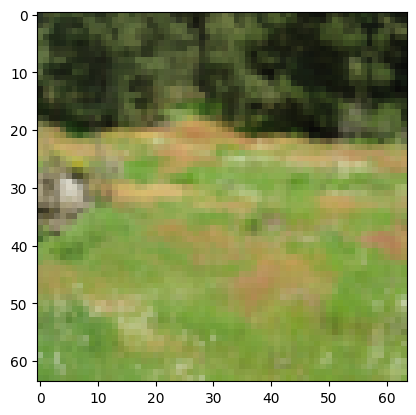

In [6]:
# now let's see the images
idx = np.random.randint(0, x_train.shape[0] - 1)
plt.imshow(x_train[idx])
print('y = ' + str(y_train_ini[idx]) + " and it is a " + str(classes[y_train_ini[idx]].decode('utf-8')) + ".")

In [7]:
# exploring the dataset
print(x_train.shape, y_train_ini.shape)
print(x_test.shape, y_test_ini.shape)
print('No. of training examples:', x_train.shape[0])
print('The dims of an image is:', x_train.shape[1],"," ,x_train.shape[2])

(209, 64, 64, 3) (209,)
(50, 64, 64, 3) (50,)
No. of training examples: 209
The dims of an image is: 64 , 64


In [8]:
y_train = y_train_ini.reshape(1, -1)
y_test = y_test_ini.reshape(1, -1)

In [9]:
y_train.shape, y_test.shape

((1, 209), (1, 50))

In [10]:
# now flatten the images along the columns (vertically)
x_train_flat = x_train.reshape(x_train.shape[0], -1).T
x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# now standardize
train_x = x_train_flat/255.
test_x = x_test_flat/255.

print(train_x.shape, test_x.shape)


(12288, 209) (12288, 50)


### 3. Architecture of your model

2-layer neural network or L-Layer neural network we will both and compare performance for different values of L.

<br>
General methodology:<br>
1. Initialize parameters<br>
2. Loop for iters:<br>
    forward prog.<br>
    compute cost<br>
    Backward prog.<br>
    Update params<br>
3. Use trained params to predict the labels


### 4. Two-layer NN 
using functions that we defined in previous lab assignment

In [11]:
n_x = 12288 # num_px * num_px * 3
n_h = 7
n_y = 1
layer_dims = (n_x, n_h, n_y)

In [12]:
def two_layer_model(x, y, layer_dims, lr=0.01, iters=3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    (n_x, n_h, n_y) = layer_dims
    params = initialize(n_x, n_h,n_y)
    
    # get the params
    w1 = params['w1']
    b1 = params['b1']
    w2 = params['w2']
    b2 = params['b2']

    for i in range(0, iters):
        a1, cache1 = linear_activation_forward(x, w1, b1, "relu")
        a2, cache2 = linear_activation_forward(a1, w2, b2, "sigmoid")

        cost = compute_cost(a2, y)

        # initializing backward propagation.
        da2 = - (np.divide(y, a2) - np.divide(1-y, 1-a2))

        da1, dw2, db2 = linear_activation_backward(da2, cache2, "sigmoid")
        da0, dw1, db1 = linear_activation_backward(da1, cache1, "relu")

        grads['dW1'] = dw1
        grads['db1'] = db1
        grads['dW2'] = dw2
        grads['db2'] = db2

        # update parameters
        parameters = update_params(params, grads, lr)

        w1 = parameters["w1"]
        b1 = parameters["b1"]
        w2 = parameters["w2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(lr))
    plt.show()
    
    return parameters





Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6741720215218561
Cost after iteration 200: 0.6627028815831675
Cost after iteration 300: 0.655700521368028
Cost after iteration 400: 0.6514004468023891
Cost after iteration 500: 0.6487445792610415
Cost after iteration 600: 0.6470957194426633
Cost after iteration 700: 0.6460674782096532
Cost after iteration 800: 0.6454238309414233
Cost after iteration 900: 0.6450196062263795
Cost after iteration 1000: 0.6447649279085749
Cost after iteration 1100: 0.6446041915701934
Cost after iteration 1200: 0.6445025296966256
Cost after iteration 1300: 0.6444381060959142
Cost after iteration 1400: 0.6443971985702466
Cost after iteration 1500: 0.6443711632252483
Cost after iteration 1600: 0.6443545623068746
Cost after iteration 1700: 0.6443439744249891
Cost after iteration 1800: 0.6443371737933267
Cost after iteration 1900: 0.644332774197435
Cost after iteration 2000: 0.6443298991344206
Cost after iteration 2100: 0.6443279924489338
Cos

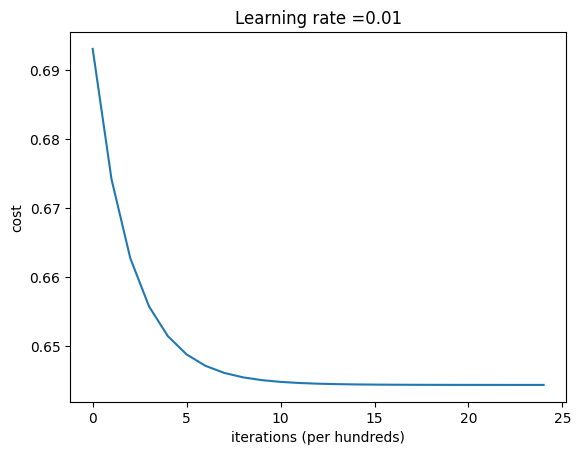

In [13]:
parameters = two_layer_model(train_x, y_train, layer_dims = (n_x, n_h, n_y), iters = 2500, print_cost=True)


In [14]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of an L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- python dictionary containing your parameters

    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    L = len(parameters) // 2
    p = np.zeros((1, m))

    # Forward propagation
    AL, caches = model_propagate(X, parameters)

    # Convert probabilities to 0/1 predictions
    for i in range(AL.shape[1]):
        if AL[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    
    print("Accuracy: " + str(np.sum((p == y) / m)))
        
    return p


In [15]:
predictions_train = predict(train_x, y_train, parameters)

Accuracy: 0.6555023923444976


In [16]:
predictions_test = predict(test_x, y_test, parameters)

Accuracy: 0.3400000000000001


### 5. L-Layer Neural Network

In [17]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [18]:
def L_layer_model(x, y, layers_dims, lr=0.0075, iters=3000, print_cost=False):
    np.random.seed(1)
    costs = []

    params = initialize_deep(layers_dims)

    for i in range(0, iters):
        al, caches = model_propagate(x, params)
        cost = compute_cost(al, y)
        grads = L_model_backward(al, y, caches)
        parameters = update_params(params, grads, lr)

        if(print_cost and i%100 == 0):
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

        # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(lr))
    plt.show()
    
    return parameters
    

Cost after iteration 0: 0.811602


Cost after iteration 100: 0.667670
Cost after iteration 200: 0.633982
Cost after iteration 300: 0.605747
Cost after iteration 400: 0.562971
Cost after iteration 500: 0.415941
Cost after iteration 600: 0.320471
Cost after iteration 700: 0.232473
Cost after iteration 800: 0.148476
Cost after iteration 900: 0.087503
Cost after iteration 1000: 0.057388
Cost after iteration 1100: 0.039937
Cost after iteration 1200: 0.030271
Cost after iteration 1300: 0.024070
Cost after iteration 1400: 0.019657
Cost after iteration 1500: 0.016492
Cost after iteration 1600: 0.014169
Cost after iteration 1700: 0.012192
Cost after iteration 1800: 0.010697
Cost after iteration 1900: 0.009464
Cost after iteration 2000: 0.008488
Cost after iteration 2100: 0.007662
Cost after iteration 2200: 0.006931
Cost after iteration 2300: 0.006335
Cost after iteration 2400: 0.005813


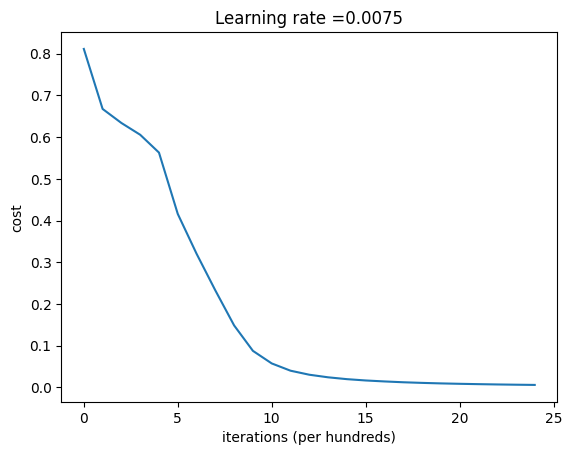

In [19]:
parameters = L_layer_model(train_x, y_train, layers_dims, iters = 2500, print_cost = True)


In [20]:
pred_train = predict(train_x, y_train, parameters)

Accuracy: 0.9999999999999998


In [21]:
pred_test = predict(test_x, y_test, parameters)

Accuracy: 0.8


### 7. Test with your own image 
and do learn about `Ha initialization`.

End Assignment.